In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [3]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [4]:
path_data = "../../results_explored_by_task/anuran_defense/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [5]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.592814,0.582135,0.638434,0.592814,0.240362,0.002811,0.013567,0.572026,0.583750,0.591874,0.583750,8980,Group_4
1,DecisionTree,0.736527,0.737268,0.739908,0.736527,0.471760,0.005889,0.005294,0.668716,0.670862,0.675863,0.670862,8980,Group_4
2,Bagging,0.874251,0.874160,0.874132,0.874251,0.744908,0.039830,0.006575,0.758399,0.758408,0.758704,0.758408,8980,Group_4
3,RandomForest,0.844311,0.844805,0.849171,0.844311,0.691178,0.143173,0.013144,0.786313,0.789078,0.799993,0.789078,8980,Group_4
4,ExtraTrees,0.820359,0.820941,0.827402,0.820359,0.645603,0.109433,0.014299,0.763205,0.766001,0.776958,0.766001,8980,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.861244,0.861244,0.862230,0.861244,0.723474,9.098772,0.009412,0.854046,0.854155,0.855143,0.854155,2838,prottrans_uniref
7,Hist Gradient Boosting,0.875598,0.875558,0.875679,0.875598,0.751077,5.596318,0.011997,0.854069,0.854155,0.854823,0.854155,2838,prottrans_uniref
8,SVC,0.583732,0.581186,0.588428,0.583732,0.173466,0.041086,0.026572,0.527430,0.533810,0.534514,0.533810,2838,prottrans_uniref
9,Gaussian Process,0.569378,0.561877,0.578699,0.569378,0.150394,0.121879,0.032469,0.507764,0.513297,0.514742,0.513297,2838,prottrans_uniref


In [6]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.592814,0.582135,0.638434,0.592814,0.240362,0.002811,0.013567,0.572026,0.583750,0.591874,0.583750,8980,Group_4,1.015529,1.017671,1.078666,1.015529
1,DecisionTree,0.736527,0.737268,0.739908,0.736527,0.471760,0.005889,0.005294,0.668716,0.670862,0.675863,0.670862,8980,Group_4,1.097881,1.102513,1.094761,1.097881
2,Bagging,0.874251,0.874160,0.874132,0.874251,0.744908,0.039830,0.006575,0.758399,0.758408,0.758704,0.758408,8980,Group_4,1.152745,1.152639,1.152139,1.152745
3,RandomForest,0.844311,0.844805,0.849171,0.844311,0.691178,0.143173,0.013144,0.786313,0.789078,0.799993,0.789078,8980,Group_4,1.069998,1.074387,1.061473,1.069998
4,ExtraTrees,0.820359,0.820941,0.827402,0.820359,0.645603,0.109433,0.014299,0.763205,0.766001,0.776958,0.766001,8980,Group_4,1.070964,1.075650,1.064926,1.070964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.861244,0.861244,0.862230,0.861244,0.723474,9.098772,0.009412,0.854046,0.854155,0.855143,0.854155,2838,prottrans_uniref,1.008299,1.008429,1.008288,1.008299
7,Hist Gradient Boosting,0.875598,0.875558,0.875679,0.875598,0.751077,5.596318,0.011997,0.854069,0.854155,0.854823,0.854155,2838,prottrans_uniref,1.025104,1.025161,1.024398,1.025104
8,SVC,0.583732,0.581186,0.588428,0.583732,0.173466,0.041086,0.026572,0.527430,0.533810,0.534514,0.533810,2838,prottrans_uniref,1.093520,1.101921,1.100865,1.093520
9,Gaussian Process,0.569378,0.561877,0.578699,0.569378,0.150394,0.121879,0.032469,0.507764,0.513297,0.514742,0.513297,2838,prottrans_uniref,1.109257,1.106570,1.124250,1.109257


In [7]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage,MCC
0,KNeighbors,0.572026,0.583750,0.591874,0.583750,8980,Group_4,Training,NaN
1,DecisionTree,0.668716,0.670862,0.675863,0.670862,8980,Group_4,Training,NaN
2,Bagging,0.758399,0.758408,0.758704,0.758408,8980,Group_4,Training,NaN
3,RandomForest,0.786313,0.789078,0.799993,0.789078,8980,Group_4,Training,NaN
4,ExtraTrees,0.763205,0.766001,0.776958,0.766001,8980,Group_4,Training,NaN
...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.861244,0.861244,0.862230,0.861244,2838,prottrans_uniref,Validating,0.723474
7,Hist Gradient Boosting,0.875558,0.875598,0.875679,0.875598,2838,prottrans_uniref,Validating,0.751077
8,SVC,0.581186,0.583732,0.588428,0.583732,2838,prottrans_uniref,Validating,0.173466
9,Gaussian Process,0.561877,0.569378,0.578699,0.569378,2838,prottrans_uniref,Validating,0.150394


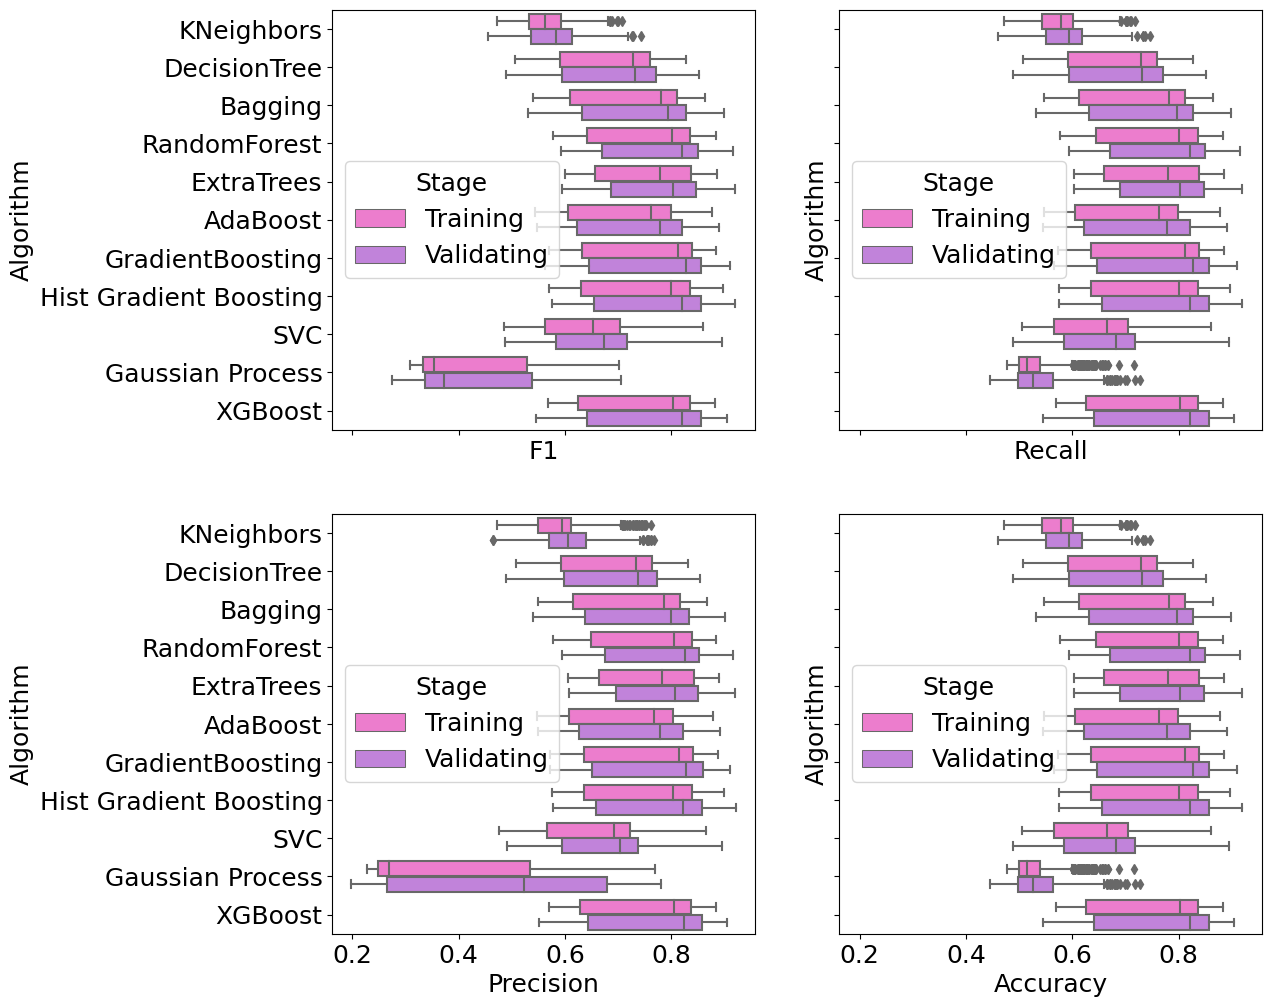

In [8]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

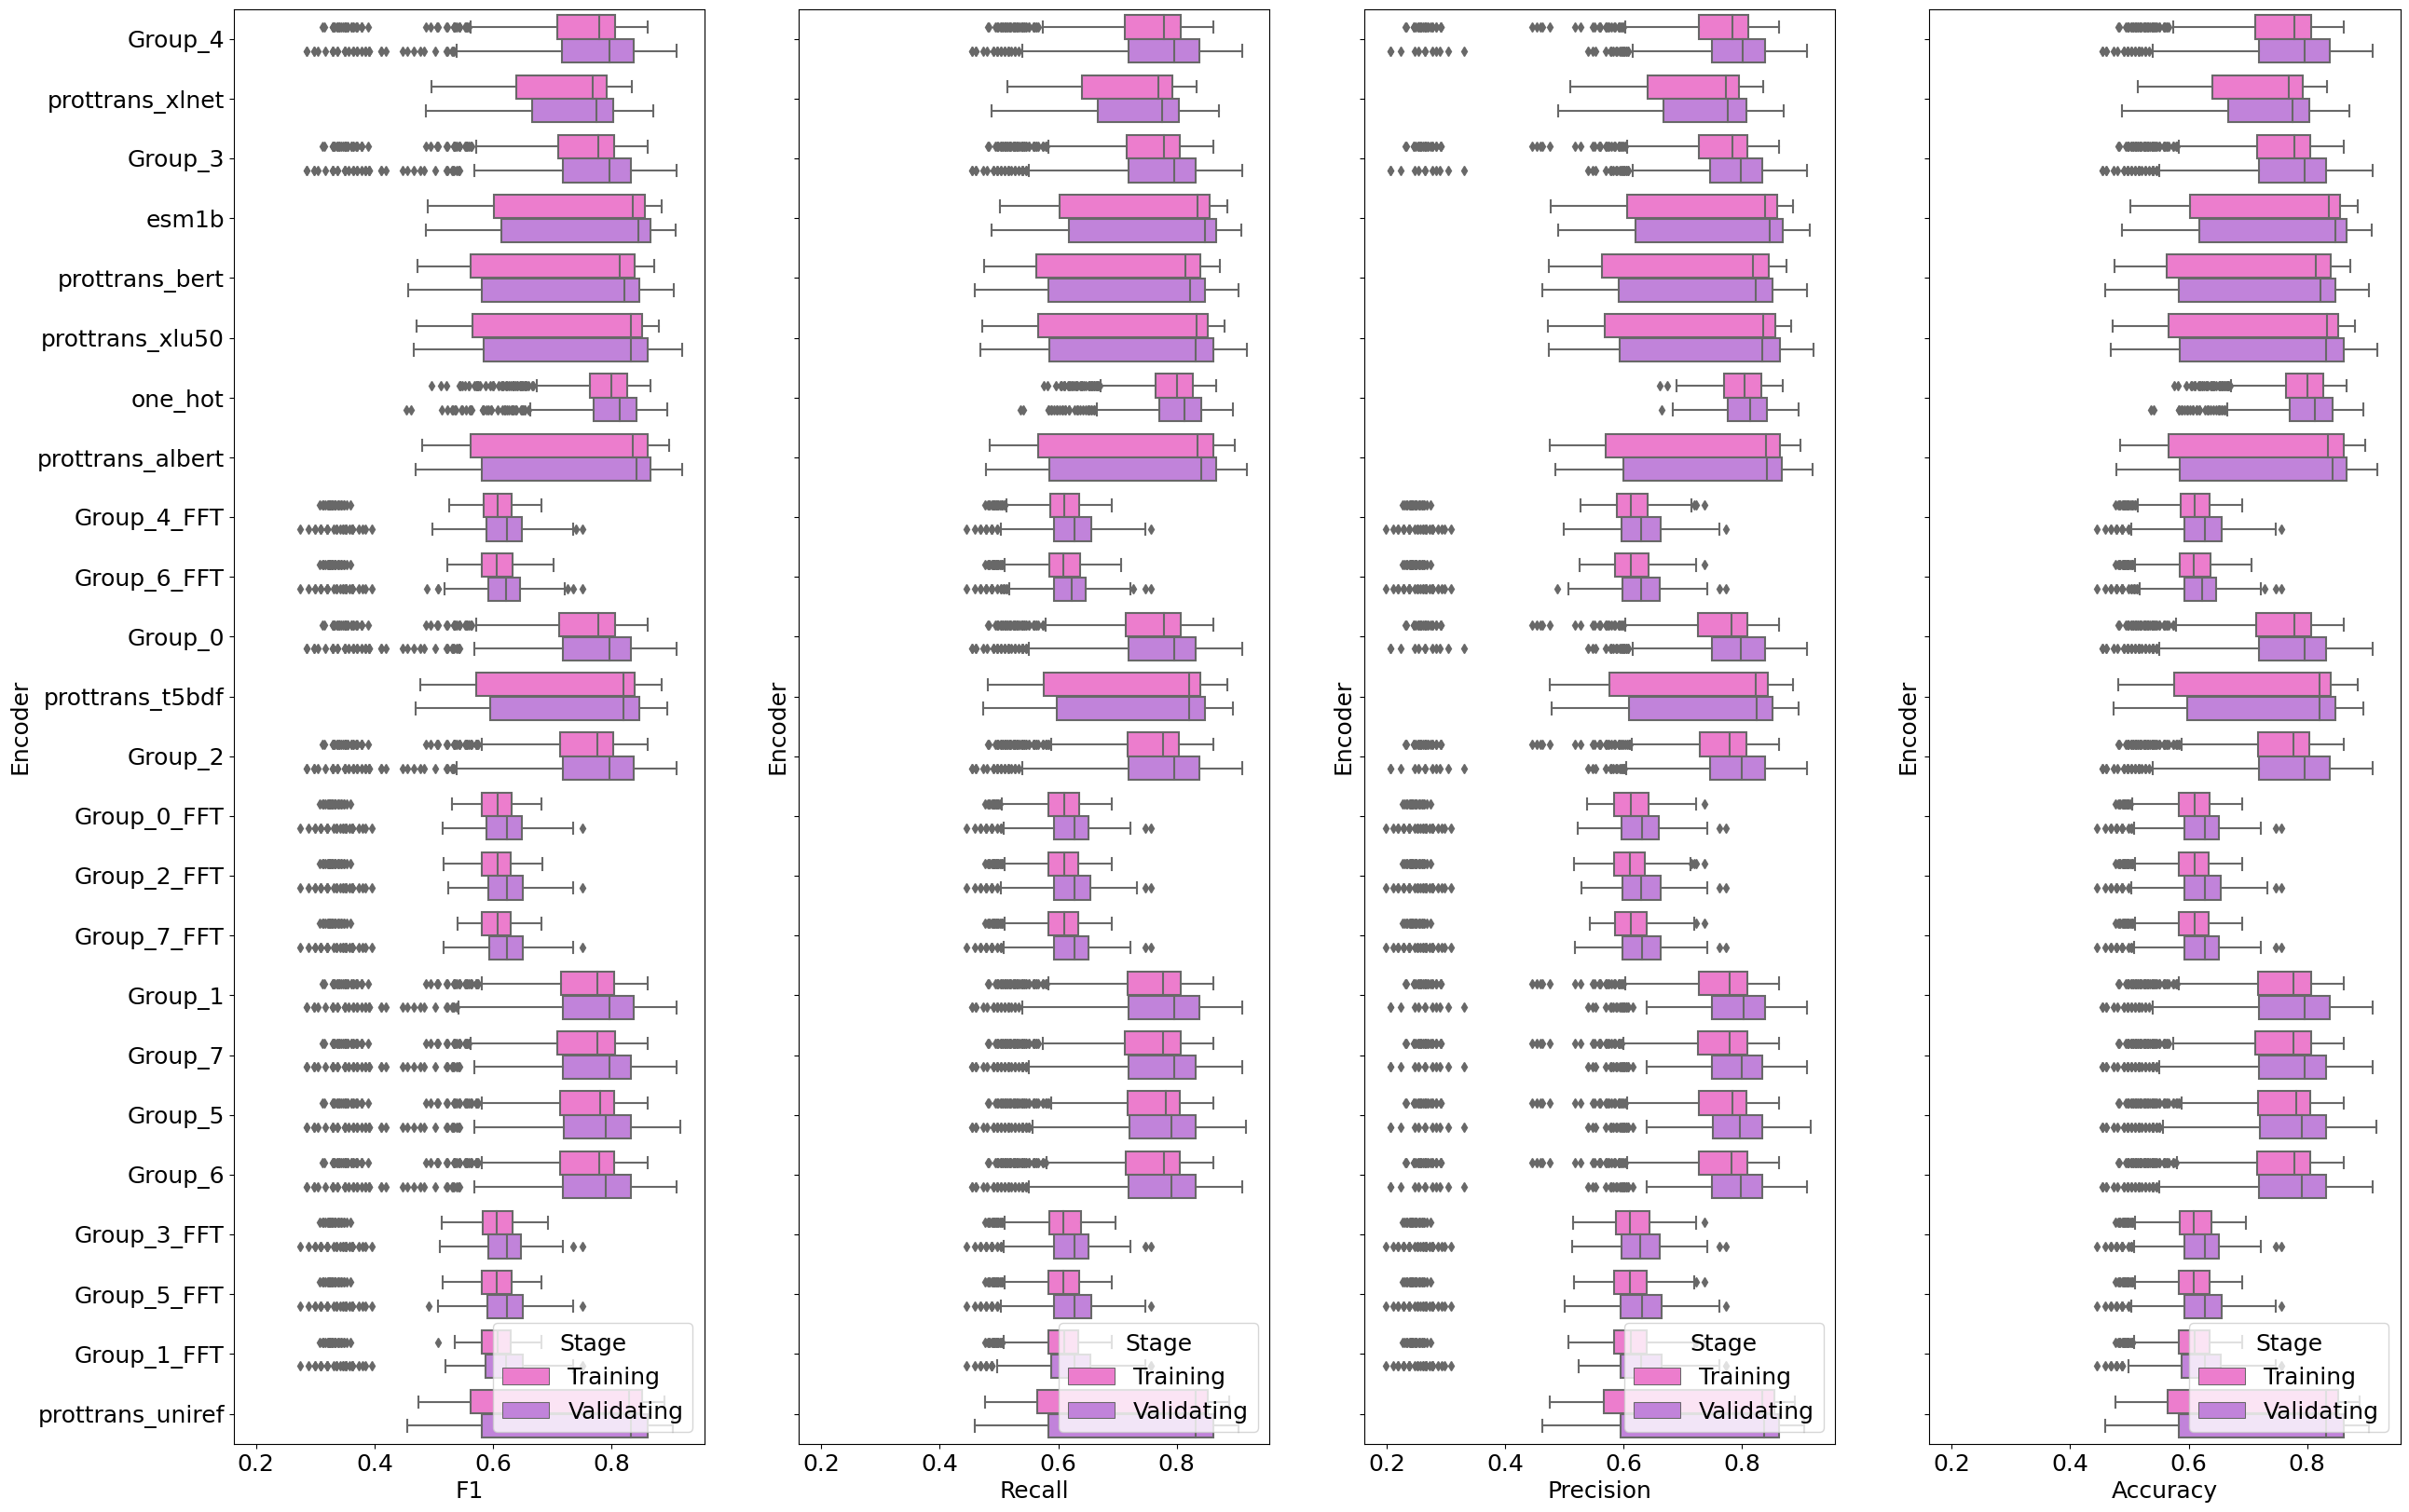

In [9]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

In [12]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(15, df_results_train, df_results_validation)
df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
88,ExtraTrees,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
90,ExtraTrees,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
92,ExtraTrees,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
95,ExtraTrees,prottrans_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
167,Hist Gradient Boosting,prottrans_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
208,RandomForest,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
210,RandomForest,prottrans_albert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
211,RandomForest,prottrans_bert,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
213,RandomForest,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
215,RandomForest,prottrans_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16


In [11]:
df_results_validation[(df_results_validation["Algorithm"] == "ExtraTrees") & (df_results_validation["Encoder"] == "prottrans_t5bdf")].describe()

,Accuracy,F1,Precision,Recall,MCC,Iteration
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.854705,0.854644,0.857571,0.854705,0.711834,5391.933333
std,0.016881,0.016913,0.016417,0.016881,0.033157,3253.326297
min,0.822967,0.822568,0.822939,0.822967,0.645451,475.000000
25%,0.842105,0.842176,0.850165,0.842105,0.692384,2132.750000
50%,0.851675,0.851681,0.855363,0.851675,0.706819,5933.500000
75%,0.869617,0.869554,0.871349,0.869617,0.739541,8069.500000
max,0.885167,0.885120,0.885235,0.885167,0.770071,9851.000000
